In [1]:
import pyaudio
import wave
import speech_recognition as sr
from pydub import AudioSegment
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

In [5]:
#Record
frames_per_buffer= 3200  # Record in buffer of 3200 samples (memory)
format= pyaudio.paInt32 #32 bit per sample
channels= 1
sample_rate= 44100

p= pyaudio.PyAudio() #pyaudio object
stream= p.open(format= format, 
               channels= channels,
               rate= sample_rate,
               input= True, #to capture audio
               frames_per_buffer= frames_per_buffer)


print("Start Recording")

seconds=10 #record duration
frames=[] # Initialize array to store frames

# Store data in buffer for 3 seconds
for i in range(0, int(sample_rate / frames_per_buffer * seconds)):
    data = stream.read(frames_per_buffer)  #read 3200 frame at each iteration
    frames.append(data)

print("Finished Recording")  

stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

wf= wave.open("Record.wav", "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(sample_rate)

#write all frames in binary string, combine all frames into binary string .
wf.writeframes(b''.join(frames))
wf.close()

Start Recording
Finished Recording


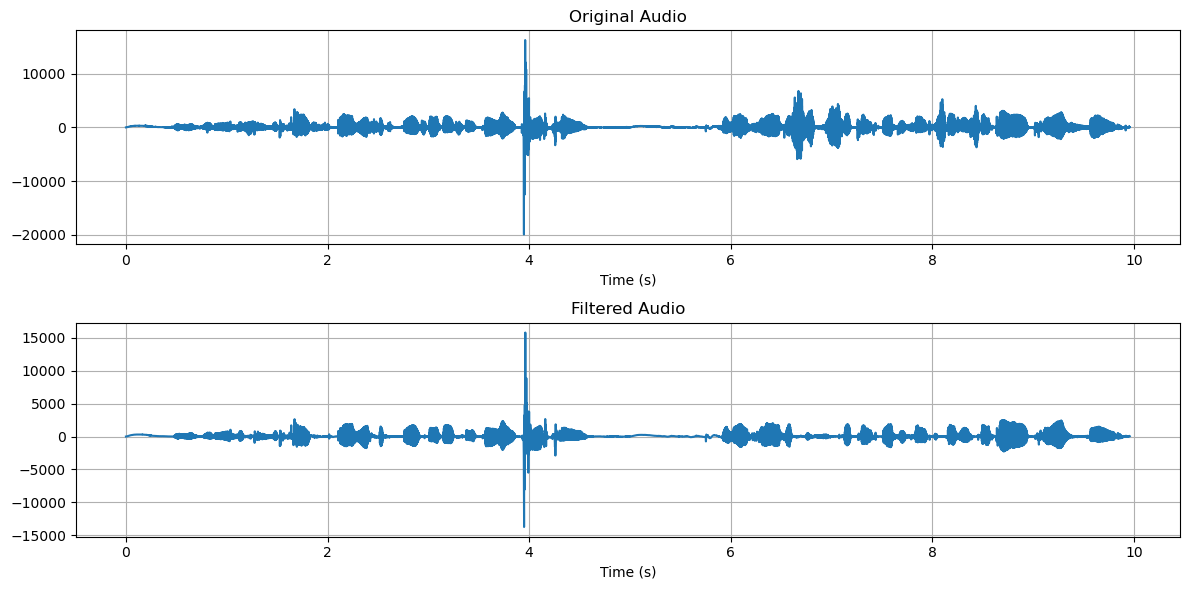

In [14]:
import numpy as np
import scipy.signal as sg
import pydub
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio, display

%matplotlib inline

def low_pass_filter(x, fr, cutoff_frequency):
    # Design a low-pass filter
    nyquist = 0.5 * fr
    normal_cutoff = cutoff_frequency / nyquist
    b, a = sg.butter(6, normal_cutoff, btype='low', analog=False)
    
    # Apply the filter
    x_filtered = sg.lfilter(b, a, x)
    
    return x_filtered

def plot_audio(x, x_filtered, fr):
    time = np.arange(0, len(x)) / fr
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, x)
    plt.title('Original Audio')
    plt.xlabel('Time (s)')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(time, x_filtered)
    plt.title('Filtered Audio')
    plt.xlabel('Time (s)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

# Example usage:
# Replace 'your_audio_file.wav' with the path to your audio file.
audio_file_path = 'two_audios.wav'

# Load the audio file
audio = pydub.AudioSegment.from_wav(audio_file_path)
x = np.array(audio.get_array_of_samples()) / 2.**15
fr = audio.frame_rate

# Play the original audio
play(x, fr)

# Apply low-pass filter
cutoff_frequency = 500  # Adjust as needed
x_filtered = low_pass_filter(x, fr, cutoff_frequency)

# Play the filtered audio
play(x_filtered, fr)

# Save the filtered audio to a new WAV file
filtered_wav_file_path = 'filtered_audio.wav'
sf.write(filtered_wav_file_path, x_filtered, fr)

# Plot the original and filtered signals
plot_audio(x, x_filtered, fr)


In [15]:
audio_file = sr.AudioFile("filtered_audio.wav")
print(type(audio_file))
#class b3ml mno object feh builtin functions beh t recognize el soot
recognizer= sr.Recognizer()
#standard value for speech , less than 300 it is just a backgroundnoise
recognizer.energy_threshold=300


#recognize_google must have audio of type audio data,
#our audio is a type of audio file
'''to convert, use context manager (with) to open and read the audio file,
with statement is used in exception handling, 
it ensures proper acquisition and release of resources.'''
#handles any exceptions like try and catch
with audio_file as source:
    #for noisy audio files                     el noise feh awl nos sanya mn el record
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    #record converts audio_file_data to audio_data(digital to continuos)
    audio_file_data= recognizer.record(source)
#print(type(audio_file_data))
#takes audio_data (continuous data)
text= recognizer.recognize_google(audio_data=audio_file_data, language="en-US")
print(text)

<class 'speech_recognition.AudioFile'>


UnknownValueError: 